## Реализация Adaline на Python


### Подготовка данных


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
url = (
    "https://archive.ics.uci.edu/ml/"
    "machine-learning-databases/iris/iris.data"
)

data = pd.read_csv(url, header=None, encoding="utf-8")

In [3]:
X = data.iloc[:100, [0, 2]].values

y = data.iloc[:100, 4].values
y = np.where(y == "Iris-setosa", 1, 0)

### Реализация алгоритма


In [4]:
class AdalineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(seed=self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.0)

        self.losses_ = []

        for epoch in range(self.n_iter):
            net_input = self.get_net_input(X)
            output = self.activation(net_input)

            errors = y - output

            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()

            loss = (errors**2).mean()
            self.losses_.append(loss)

        return self

    def get_net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(
            self.activation(self.get_net_input(X)) >= 0.5,
            1,
            0,
        )

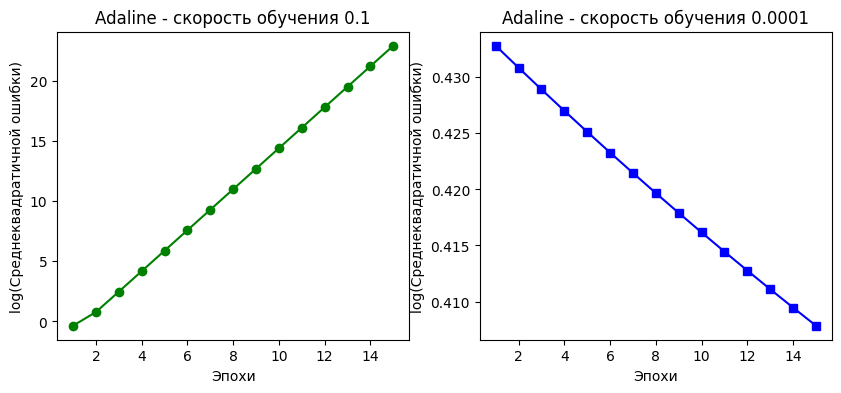

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)

ax[0].plot(
    range(1, len(ada1.losses_) + 1),
    np.log10(ada1.losses_),
    marker="o",
    color="green",
    label="eta=0.1",
)
ax[0].set_xlabel("Эпохи")
ax[0].set_ylabel("log(Среднеквадратичной ошибки)")
ax[0].set_title("Adaline - скорость обучения 0.1")


ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)

ax[1].plot(
    range(1, len(ada2.losses_) + 1),
    ada2.losses_,
    marker="s",
    color="blue",
    label="eta=0.01",
)
ax[1].set_xlabel("Эпохи")
ax[1].set_ylabel("log(Среднеквадратичной ошибки)")
ax[1].set_title("Adaline - скорость обучения 0.0001")

plt.show()

### Визуализация решающих границ для двумерных наборов данных.


In [6]:
from matplotlib.colors import ListedColormap

plt.show()


def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Настройка генератора меток
    markers = ["o", "s", "^", "v", "<"]
    colors = ("red", "blue", "lightgreen", "gray", "cyan")

    cmap = ListedColormap(colors[: len(np.unique(y))])

    # Варьируемость первого признака
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1

    # Варьируемость второго признака
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Координатные сетки из двух одномерных массивов
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution),
    )

    # Создание из сеток двумерной матрицы признаков.
    # Получение предсказаний на основе матрицы признаков.
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    # Пределываем список предсказаний в матрицу той же размерности,
    # что и xx1.
    lab = lab.reshape(xx1.shape)

    # Рисуем контуры
    plt.contour(xx1, xx2, lab, alpha=0.8, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Добавляем метки существующих в наборе точек.
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f"Class {cl}",
            edgecolor="black",
        )

### Стандартизация как вид масштабирования признаков


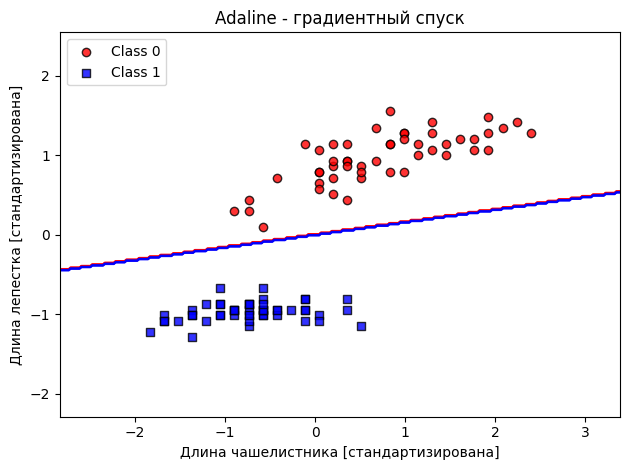

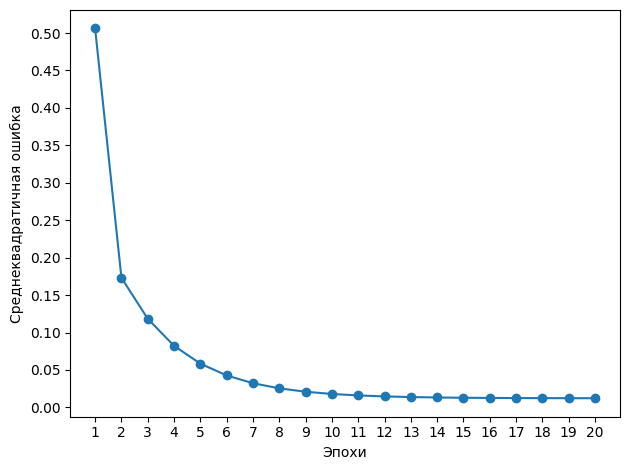

In [7]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada_gd = AdalineGD(eta=0.5, n_iter=20)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)

plt.title("Adaline - градиентный спуск")
plt.xlabel("Длина чашелистника [стандартизирована]")
plt.ylabel("Длина лепестка [стандартизирована]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

plt.plot(
    range(1, len(ada_gd.losses_) + 1),
    ada_gd.losses_,
    marker="o",
)
plt.xlabel("Эпохи")
plt.ylabel("Среднеквадратичная ошибка")
plt.xticks(range(1, len(ada_gd.losses_) + 1))
plt.yticks([0.05 * i for i in range(0, 11)])
plt.tight_layout()
plt.show()